# Pymaceuticals Inc.


### Analysis

In this study, 249 mice were tested to see if there was a relation between different drug treatments and tumor volume.
- Of 248 mice, the distribution of male versus female mice was almost evenly split at 51 percent male and 49 percent female.
- The drug "Capomulin" was tested on the most mice, followed by the drug "Ramicane".
- A mouse treated with Capomulin saw a significant decrease in tumor volume after 30 days.
- For mice on the drug "Capomulin" there is a strong correlation between mouse weight and tumor volume. 
- Of the four drugs "Capomulin", "Ramicane", "Infubinol", and "Ceftamin", Infubinol had the highest average tumor volume among mice with the only outlier at an average tumor volume of 36.32mm3

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID","Mouse ID"])
# Display the data table for preview
mouse_results_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mouse_count = mouse_results_complete["Mouse ID"].nunique()
mouse_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dup = mouse_results_complete.loc[mouse_results_complete.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
mouse_dup

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = mouse_results_complete.loc[(mouse_results_complete["Mouse ID"]=="g989")]
g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_results_complete.loc[(mouse_results_complete["Mouse ID"] != "g989")]
# checking to make sure there are no more duplicates of g989
# mouse_dup1 = clean_mouse_df.loc[clean_mouse_df.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
# mouse_dup1
clean_mouse_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_mouse_df["Mouse ID"].nunique()
clean_mouse_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = clean_mouse_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_median = clean_mouse_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_var = clean_mouse_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_std = clean_mouse_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_sem = clean_mouse_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_summary = pd.DataFrame({"Mean Tumor Volume": tumor_mean, "Median Tumor Volume": tumor_median, "Tumor Volume Variance": tumor_var,
                                "Tumor Volume Std. Dev.": tumor_std, "Tumor Volume Std. Err.": tumor_sem})

tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
groups = clean_mouse_df.groupby(["Drug Regimen"])

# Using the aggregation method, produce the same summary statistics in a single line.
tumor_stats = groups["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

tumor_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

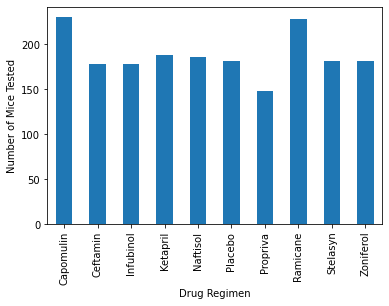

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
time_v_reg = clean_mouse_df.groupby(["Drug Regimen"]).count()["Timepoint"]



time_v_reg.plot(kind="bar")
plt.ylabel("Number of Mice Tested")



Text(0, 0.5, 'Number of Mice Tested')

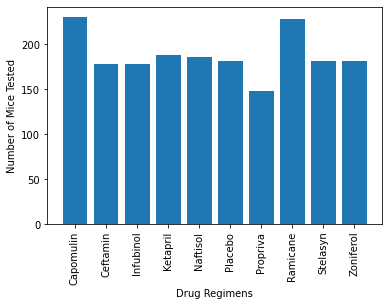

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

time_v_reg = clean_mouse_df.groupby(["Drug Regimen"])
time_sum = time_v_reg["Drug Regimen"].count()

x_axis = np.arange(len(time_sum))
y_axis = time_sum

plt.bar(x_axis, y_axis)
drugs = [value for value in x_axis]
plt.xticks(drugs, ["Capomulin", "Ceftamin","Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="90")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice Tested")




Text(0, 0.5, 'Sex')

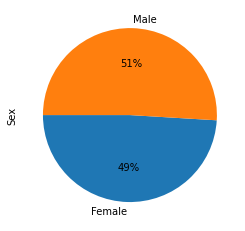

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_mouse_df.groupby(["Sex"]).count().plot(kind='pie', y="Mouse ID", autopct="%1.0f%%", legend=False, startangle=180)
plt.ylabel("Sex")


Text(0, 0.5, 'Sex')

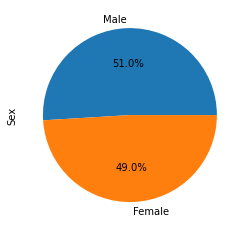

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_plt = clean_mouse_df.groupby(["Sex"]).count()["Mouse ID"]
gender_plt
labels = ["Male", "Female"]
count = [958, 922]

plt.pie(count, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest = clean_mouse_df.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tum_last = pd.merge(greatest, clean_mouse_df, on=("Mouse ID","Timepoint",))

tum_last


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [43]:


#  Put treatments into a list for for loop (and later for plot labels)
treat_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tum_empty= []

for drug in treat_list:
    rx_reg = tum_last.loc[tum_last["Drug Regimen"]== drug, "Tumor Volume (mm3)"]

    tum_empty.append(rx_reg)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quart = rx_reg.quantile([.25, .5, .75])
    lower = quart[.25]
    upper = quart[.75]
    iqr = upper- lower
    lowerbound = lower - (1.5 * iqr)
    upperbound = upper + (1.5 * iqr)
    outlier = rx_reg.loc[(rx_reg < lowerbound) | (rx_reg > upperbound)]
    

    print(f"{drug}'s potential outlier is: {outlier}")


    


Capomulin's potential outlier is: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outlier is: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outlier is: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outlier is: Series([], Name: Tumor Volume (mm3), dtype: float64)


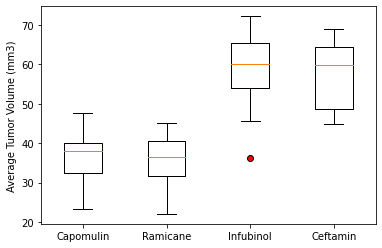

In [41]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outlier_plot = dict(marker='o', markerfacecolor='r', linestyle="none")

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Average Tumor Volume (mm3)')
ax1.set_xlabel
ax1.boxplot(tum_empty, flierprops=outlier_plot, labels=treat_list)
plt.show()



## Line and Scatter Plots

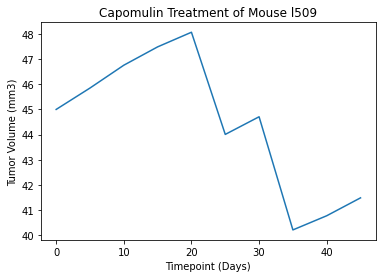

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_groups = clean_mouse_df.groupby(["Mouse ID", "Timepoint"])
mouse_sum = mouse_groups.sum()

mouse_id = "l509"

mouse_stats = mouse_sum.loc[mouse_id]

cap_line = mouse_stats.plot(kind="line", y="Tumor Volume (mm3)", title=("Capomulin Treatment of Mouse l509"), legend=False)
cap_line.set_ylabel("Tumor Volume (mm3)")
cap_line.set_xlabel("Timepoint (Days)")

plt.show()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

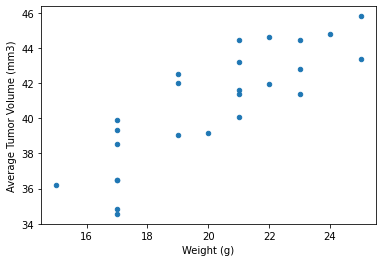

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_stats = clean_mouse_df[["Mouse ID", "Tumor Volume (mm3)", "Drug Regimen", "Weight (g)"]]
capo_clean = capo_stats.loc[(capo_stats["Drug Regimen"]=="Capomulin")]

capo_mouse = capo_clean.groupby(["Mouse ID"]).mean()

# avg_tumor = capo_mouse["Tumor Volume (mm3)"]
# avg_weight = capo_mouse["Weight (g)"]

capo_mouse.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


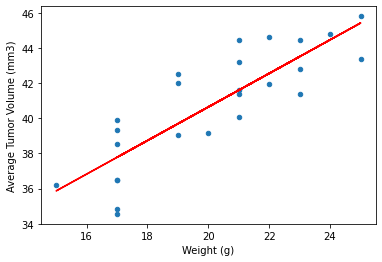

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_stats = clean_mouse_df[["Mouse ID", "Tumor Volume (mm3)", "Drug Regimen", "Weight (g)"]]
capo_clean = capo_stats.loc[(capo_stats["Drug Regimen"]=="Capomulin")]

capo_mouse = capo_clean.groupby(["Mouse ID"]).mean()
x_values = capo_mouse.iloc[:,1]
y_values = capo_mouse.iloc[:,0]

correlation = st.pearsonr(x_values, y_values)

mc_slope, mc_int, mc_r, mc_p, mc_std_err = linregress(x_values, y_values)

mc_fit = x_values * mc_slope + mc_int

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

capo_mouse.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(x_values,mc_fit, "r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
